In [1]:
%matplotlib inline
import qiime2
from qiime2 import Artifact
from biom import load_table
from tempfile import mkdtemp
from qiime2.plugins import demux, deblur, quality_filter, \
                           metadata, feature_table, alignment, \
                           phylogeny, diversity, emperor, feature_classifier, \
                           taxa, composition, woltka, empress

from biom import load_table
from deicode.rpca import auto_rpca
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from skbio.stats.distance import permanova
from skbio.stats.distance import permdisp

In [2]:
import dokdo
from qiime2.plugins.feature_table.methods import filter_samples

In [3]:
from os.path import join

In [4]:
## Input paths 
wd="/panfs/panfs1.ucsd.edu/panscratch/jhc103/microbiome-analysis"
tabledir=wd+"/02-woltka-output/"
metadata_path=wd+"/metadata/vert_metadata_sublime.txt"
metadata_path2=wd+"/metadata/vert_metadata_sublime_copy_with_header_fixed_subsampled_onesampleperspecies.txt"
metadata_path3=wd+"/metadata/vert_metadata_sublime_copy_with_header_fixed_subsampled_onesampleperspecies_nohuman.txt"
output_fig_dir="/panfs/panfs1.ucsd.edu/panscratch/jhc103/VertMetaphlan-frmerged/figures/"
tree_path="/panfs/panfs1.ucsd.edu/panscratch/jhc103/microbiome-analysis/trees/tree.nwk"

# Check out our biom table from woltka
## Load biom table into Qiime 

In [5]:
table_biom = load_table(tabledir+"species.biom")
table_biom2 = load_table(tabledir+"genus.biom")
table_biom3 = load_table(tabledir+"class.biom")
table_biom4 = load_table(tabledir+"phylum.biom")
table_biom5= load_table(tabledir+"phylum_md.biom")
table_biom6= load_table(tabledir+"ogu.biom")

In [6]:
print(table_biom.head())
table_biom.shape

# Constructed from biom file
#OTU ID	Abramis-brama_SAMEA6809635.ebi_filtered_r1r2interleaved_sampleCombined	Acanthiza-uropygialis_SAMEA6809490.ebi_filtered_r1r2interleaved_sampleCombined	Accipiter-nisus_SAMEA6809366.ebi_filtered_r1r2interleaved_sampleCombined	Acrocephalus-scirpaceus_SAMEA6809563.ebi_filtered_r1r2interleaved_sampleCombined	Acryllium-vulturinum_Song53_24613_host_filtered.fastq.gzinterleaved
k__Archaea;p__;c__;o__;f__;g__;s__halophilic archaeon DL31	0.0	0.0	0.0	0.0	0.0
k__Archaea;p__;c__;o__;f__;g__;s__uncultured archaeon A07HN63	0.0	0.0	0.0	0.0	0.0
k__Archaea;p__;c__;o__;f__;g__;s__uncultured archaeon A07HR60	17.0	0.0	0.0	0.0	0.0
k__Archaea;p__;c__;o__;f__;g__;s__uncultured archaeon A07HR67	0.0	0.0	0.0	0.0	0.0
k__Archaea;p__Candidatus Bathyarchaeota;c__;o__;f__;g__;s__Candidatus Bathyarchaeota archaeon RBG_13_38_9	0.0	0.0	0.0	0.0	0.0


(7021, 662)

In [7]:
species_table_sampleID=Artifact.import_data("FeatureTable[Frequency]",table_biom)
genus_table_sampleID=Artifact.import_data("FeatureTable[Frequency]",table_biom2)
class_table_sampleID=Artifact.import_data("FeatureTable[Frequency]",table_biom3)
phylum_table_sampleID=Artifact.import_data("FeatureTable[Frequency]",table_biom4)
phylum_table_sampleID_md=Artifact.import_data("FeatureTable[Frequency]",table_biom5)


## Visualize taxonomic table interested

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  war

<visualization: Visualization uuid: 5d171ac5-128b-4760-b3cf-0f3a7fccecc4>

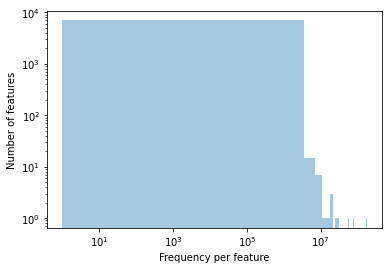

In [9]:
output_viz = feature_table.visualizers.summarize(species_table_sampleID)
output_viz.visualization

## Use qiime2 CLI to generate table into qza to change species ID into sampleID

In [10]:
key_for_running_again=False

In [12]:
if key_for_running_again:
    !qiime tools import \
        --input-path $tabledir"species.biom" \
        --type 'FeatureTable[Frequency]' \
        --input-format BIOMV210Format \
        --output-path $tabledir"species.qza"

    !qiime tools import \
        --input-path $tabledir"genus.biom" \
        --type 'FeatureTable[Frequency]' \
        --input-format BIOMV210Format \
        --output-path $tabledir"genus.qza"

    !qiime tools import \
        --input-path $tabledir"class.biom" \
        --type 'FeatureTable[Frequency]' \
        --input-format BIOMV210Format \
        --output-path $tabledir"class.qza"

    !qiime tools import \
        --input-path $tabledir"phylum.biom" \
        --type 'FeatureTable[Frequency]' \
        --input-format BIOMV210Format \
        --output-path $tabledir"phylum.qza"
    !qiime tools import \
        --input-path $tabledir"ogu.biom" \
        --type 'FeatureTable[Frequency]' \
        --input-format BIOMV210Format \
        --output-path $tabledir"ogu.qza"

In [15]:
## Change the sampleID!
if key_for_running_again:
    !qiime feature-table group \
        --i-table $tabledir"species.qza" \
        --p-axis sample \
        --m-metadata-file $metadata_path \
        --m-metadata-column species_id \
        --p-mode sum \
        --o-grouped-table $tabledir"species_species_id.qza"

    !qiime feature-table group \
        --i-table $tabledir"genus.qza" \
        --p-axis sample \
        --m-metadata-file $metadata_path \
        --m-metadata-column species_id \
        --p-mode sum \
        --o-grouped-table $tabledir"genus_species_id.qza"

    !qiime feature-table group \
        --i-table $tabledir"class.qza" \
        --p-axis sample \
        --m-metadata-file $metadata_path \
        --m-metadata-column species_id \
        --p-mode sum \
        --o-grouped-table $tabledir"class_species_id.qza"

    !qiime feature-table group \
        --i-table $tabledir"phylum.qza" \
        --p-axis sample \
        --m-metadata-file $metadata_path \
        --m-metadata-column species_id \
        --p-mode sum \
        --o-grouped-table $tabledir"phylum_species_id.qza"
    
    !qiime feature-table group \
        --i-table $tabledir"ogu.qza" \
        --p-axis sample \
        --m-metadata-file $metadata_path \
        --m-metadata-column species_id \
        --p-mode sum \
        --o-grouped-table $tabledir"ogu_species_id.qza"

In [8]:
species_table_speciesid_md=Artifact.load("/panfs/panfs1.ucsd.edu/panscratch/jhc103/microbiome-analysis/02-woltka-output/species_species_id.qza")
genus_table_speciesid_md=Artifact.load("/panfs/panfs1.ucsd.edu/panscratch/jhc103/microbiome-analysis/02-woltka-output/genus_species_id.qza")
class_table_speciesid_md=Artifact.load("/panfs/panfs1.ucsd.edu/panscratch/jhc103/microbiome-analysis/02-woltka-output/class_species_id.qza")
phylum_table_speciesid_md=Artifact.load("/panfs/panfs1.ucsd.edu/panscratch/jhc103/microbiome-analysis/02-woltka-output/phylum_species_id.qza")
ogu_table_speciesid=Artifact.load("/panfs/panfs1.ucsd.edu/panscratch/jhc103/microbiome-analysis/02-woltka-output/ogu_species_id.qza")

# Import our tree into Phylogeny[Rooted]

In [9]:
wol_tree=Artifact.import_data("Phylogeny[Rooted]", tree_path, view_type="NewickFormat")

# Check out our metadata 
## modify for use first change problematic header names

In [10]:
df=pd.read_csv(metadata_path, sep='\t')
df.set_index("SampleID", inplace=True)

In [10]:
df.head()
df.shape

(662, 27)

In [11]:
# Rename conflicting column name
df_renamed=df.rename(columns={'species_id':'sampleid'})
df_renamed

sample_name_2  \
SampleID                                                                 
Artibeus-intermedius_S_S_Temp_D709-AK1780_filte...       2338.0623.7.I   
Carollia-perspicillata_S_S_Temp_D709-AK1682_fil...       2338.0620.8.I   
Carollia-perspicillata_S_S_Temp_D712-AK1544_fil...       2338.0623.9.I   
Carollia-perspicillata_S_S_Temp_D712-AK1546_fil...     2338.0627.22.I2   
Carollia-perspicillata_S_S_Temp_D709-AK1681_fil...      2338.0701.17.I   
...                                                                ...   
Tringa-glareola_SAMEA6809633.ebi_filtered_r1r2i...  13881.SAMEA6809633   
Tringa-glareola_SAMEA6809634.ebi_filtered_r1r2i...  13881.SAMEA6809634   
Apodemus-flavicollis_SAMEA6809435.ebi_filtered_...  13881.SAMEA6809435   
Apodemus-flavicollis_SAMEA6809456.ebi_filtered_...  13881.SAMEA6809456   
Zingel-zingel_SAMEA6809475.ebi_filtered_r1r2int...  13881.SAMEA6809475   

                                                    studyID  \
SampleID                                                      
Artibeus-intermedius_S_S_Temp_D709-AK1780_filte...     2338   
Carollia-perspicillata_S_S_Temp_D709-AK1682_fil...     2338   
Carollia-perspicillata_S_S_Temp_D712-AK1544_fil...     2338   
Carollia-perspicillata_S_S_Temp_D712-AK1546_fil...     2338   
Carollia-perspicillata_S_S_Temp_D709-AK1681_fil...     2338   
...                                                     ...   
Tringa-glareola_SAMEA6809633.ebi_filtered_r1r2i...    13881   
Tringa-glareola_SAMEA6809634.ebi_filtered_r1r2i...    13881   
Apodemus-flavicollis_SAMEA6809435.ebi_filtered_...    13881   
Apodemus-flavicollis_SAMEA6809456.ebi_filtered_...    13881   
Zingel-zingel_SAMEA6809475.ebi_filtered_r1r2int...    13881   

                                                                          file_filtered_r1r2_combined  \
SampleID                                                                                                
Artibeus-intermedius_S_S_Temp_D709-AK1780_filte...  Artibeus-intermedius_S_S_Temp_D709-AK1780_filt...   
Carollia-perspicillata_S_S_Temp_D709-AK1682_fil...  Carollia-perspicillata_S_S_Temp_D709-AK1682_fi...   
Carollia-perspicillata_S_S_Temp_D712-AK1544_fil...  Carollia-perspicillata_S_S_Temp_D712-AK1544_fi...   
Carollia-perspicillata_S_S_Temp_D712-AK1546_fil...  Carollia-perspicillata_S_S_Temp_D712-AK1546_fi...   
Carollia-perspicillata_S_S_Temp_D709-AK1681_fil...  Carollia-perspicillata_S_S_Temp_D709-AK1681_fi...   
...                                                                                               ...   
Tringa-glareola_SAMEA6809633.ebi_filtered_r1r2i...  Tringa-glareola_SAMEA6809633.ebi_filtered_r1r2...   
Tringa-glareola_SAMEA6809634.ebi_filtered_r1r2i...  Tringa-glareola_SAMEA6809634.ebi_filtered_r1r2...   
Apodemus-flavicollis_SAMEA6809435.ebi_filtered_...  Apodemus-flavicollis_SAMEA6809435.ebi_filtered...   
Apodemus-flavicollis_SAMEA6809456.ebi_filtered_...  Apodemus-flavicollis_SAMEA6809456.ebi_filtered...   
Zingel-zingel_SAMEA6809475.ebi_filtered_r1r2int...  Zingel-zingel_SAMEA6809475.ebi_filtered_r1r2co...   

                                                    reads_per_unfiltered_file  \
SampleID                                                                        
Artibeus-intermedius_S_S_Temp_D709-AK1780_filte...                   10812150   
Carollia-perspicillata_S_S_Temp_D709-AK1682_fil...                   28375062   
Carollia-perspicillata_S_S_Temp_D712-AK1544_fil...                  122751186   
Carollia-perspicillata_S_S_Temp_D712-AK1546_fil...                    8559788   
Carollia-perspicillata_S_S_Temp_D709-AK1681_fil...                     488426   
...                                                                       ...   
Tringa-glareola_SAMEA6809633.ebi_filtered_r1r2i...                    2751056   
Tringa-glareola_SAMEA6809634.ebi_filtered_r1r2i...                    2475492   
Apodemus-flavicollis_SAMEA6809435.ebi_filtered_...                   18162782   
Apodemus-flavicol

In [12]:
## Set a column as index 
df_renamed['SampleID_2'] = df_renamed.index
df_reindexed=df_renamed.set_index(['sampleid'])
df_reindexed['Qiita_studyID'] = ["study"+str(v) for v in df_reindexed['studyID']]## add new the studyID_categorical column to be string! 
df_reindexed

sample_name_2  studyID  \
sampleid                                                   
great_fruit-eating_bat.1          2338.0623.7.I     2338   
sebas_short-tailed_bat.1          2338.0620.8.I     2338   
sebas_short-tailed_bat.2          2338.0623.9.I     2338   
sebas_short-tailed_bat.3        2338.0627.22.I2     2338   
sebas_short-tailed_bat.4         2338.0701.17.I     2338   
...                                         ...      ...   
wood_sandpiper.1             13881.SAMEA6809633    13881   
wood_sandpiper.2             13881.SAMEA6809634    13881   
yellow-necked_field_mouse.1  13881.SAMEA6809435    13881   
yellow-necked_field_mouse.2  13881.SAMEA6809456    13881   
zingel.1                     13881.SAMEA6809475    13881   

                                                   file_filtered_r1r2_combined  \
sampleid                                                                         
great_fruit-eating_bat.1     Artibeus-intermedius_S_S_Temp_D709-AK1780_filt...   
sebas_short-tailed_bat.1     Carollia-perspicillata_S_S_Temp_D709-AK1682_fi...   
sebas_short-tailed_bat.2     Carollia-perspicillata_S_S_Temp_D712-AK1544_fi...   
sebas_short-tailed_bat.3     Carollia-perspicillata_S_S_Temp_D712-AK1546_fi...   
sebas_short-tailed_bat.4     Carollia-perspicillata_S_S_Temp_D709-AK1681_fi...   
...                                                                        ...   
wood_sandpiper.1             Tringa-glareola_SAMEA6809633.ebi_filtered_r1r2...   
wood_sandpiper.2             Tringa-glareola_SAMEA6809634.ebi_filtered_r1r2...   
yellow-necked_field_mouse.1  Apodemus-flavicollis_SAMEA6809435.ebi_filtered...   
yellow-necked_field_mouse.2  Apodemus-flavicollis_SAMEA6809456.ebi_filtered...   
zingel.1                     Zingel-zingel_SAMEA6809475.ebi_filtered_r1r2co...   

                             reads_per_unfiltered_file  reads_per_file  \
sampleid                                                                 
great_fruit-eating_bat.1                      10812150        10809968   
sebas_short-tailed_bat.1                      28375062        28354050   
sebas_short-tailed_bat.2                     122751186       122713288   
sebas_short-tailed_bat.3                       8559788         8556874   
sebas_short-tailed_bat.4                        488426          487862   
...                                                ...             ...   
wood_sandpiper.1                               2751056         2748924   
wood_sandpiper.2                               2475492         2475222   
yellow-necked_field_mouse.1                   18162782        10069464   
yellow-necked_field_mouse.2                   12783026         7543592   
zingel.1                                        691192          361858   

                             log10(reads_per_file)_full  \
sampleid                                                  
great_fruit-eating_bat.1                       7.033824   
sebas_short-tailed_bat.1                       7.452615   
sebas_short-tailed_bat.2                       8.088892   
sebas_short-tailed_bat.3                       6.932315   
sebas_short-tailed_bat.4                       5.688297   
...                                                 ...   
wood_sandpiper.1                               6.439163   
wood_sandpiper.2                               6.393614   
yellow-necked_field_mouse.1                    7.003006   
yellow-necked_field_mouse.2                    6.877578   
zingel.1                                       5.558538   

                             log10(reads_per_file) host_phylum  \
sampleid                                                         
great_fruit-eating_bat.1                         7    Chordata   
sebas_short-tailed_bat.1                         7    Chordata   
sebas_short-tailed_bat.2                         8    Chordata   
sebas_short-tailed_bat.3                         7    Chordata   
sebas_short-tailed_bat.4                         6    Chord

# Modify metdata to include 1 sample per species at most randomly
## Count the number of samples per species 


In [133]:
# len(df_reindexed.groupby('host_species')) ## ==> 288
host_species_series=df_reindexed.groupby('host_species').size()
print(host_species_series.sort_values().to_string())
print(len(host_species_series))

host_species
Abramis_brama                          1
Meleagris_gallopavo                    1
Meles_meles                            1
Melursus_ursinus                       1
Mesoplodon_bidens                      1
Mustela_putorius                       1
Myrmecophaga_tridactyla                1
Natrix_natrix                          1
Nomascus_gabriellae                    1
Nomascus_siki                          1
Notamacropus_eugenii                   1
Numida_meleagris                       1
Odocoileus_virginianus                 1
Oncorhynchus_mykiss                    1
Ophisaurus_apodus                      1
Otolemur_crassicaudatus                1
Ovis_aries                             1
Ovis_aries_musimon                     1
Panthera_pardus                        1
Papio_ursinus                          1
Parabuteo_unicinctus                   1
Parus_major                            1
Melanomys_caliginosus                  1
Martes_martes                          1
Man

## Subset the metadata randomly to one sample per host species

In [11]:
run=False
subset = True

In [12]:
## If subset is true then subset the metadata to 1 sample per species then save 
if run:
    if subset:
        df_subsampled=df_reindexed.groupby('host_species').apply(lambda x: x.sample(n=1,random_state=1)).droplevel(level=0) ## Drop level drops the host_species as index
        df_subsampled.to_csv(metadata_path2, sep='\t')
        metadata = qiime2.Metadata.load(metadata_path2)
    else: 
        metadata = qiime2.Metadata.load(metadata_path)
else: ## Default assumed that metadata at metadata_path2 is alraedy ran and ready to be loaded into metadata 1 sample per species
    metadata = qiime2.Metadata.load(metadata_path2)

In [13]:
# Pull out same metadata to subsample the biom table 
df_subsampled = pd.read_csv(metadata_path2, sep="\t")
df_subsampled


sampleid            sample_name_2  studyID  \
0                 common_bream.1       13881.SAMEA6809635    13881   
1    chestnut-rumped_thornbill.1       13881.SAMEA6809490    13881   
2         eurasian_river_otter.2       13881.SAMEA6809366    13881   
3         eurasian_sparrowhawk.1       13881.SAMEA6809563    13881   
4         vulturine_guineafowl.1       13114.song.53.s012    13114   
..                           ...                      ...      ...   
283               meadow_viper.1       13881.SAMEA6809597    13881   
284                    red_fox.1       13881.SAMEA6809362    13881   
285          aesculapian_snake.1       13881.SAMEA6809441    13881   
286                     zingel.1       13881.SAMEA6809475    13881   
287                    meerkat.1  11166.ATL.24564.meerkat    11166   

                           file_filtered_r1r2_combined  \
0    Abramis-brama_SAMEA6809635.ebi_filtered_r1r2co...   
1    Acanthiza-uropygialis_SAMEA6809490.ebi_filtere...   
2    Accipiter-nisus_SAMEA6809366.ebi_filtered_r1r2...   
3    Acrocephalus-scirpaceus_SAMEA6809563.ebi_filte...   
4    Acryllium-vulturinum_Song53_24613_host_filtere...   
..                                                 ...   
283  Vipera-ursinii_SAMEA6809597.ebi_filtered_r1r2c...   
284  Vulpes-vulpes_SAMEA6809362.ebi_filtered_r1r2co...   
285  Zamenis-longissimus_SAMEA6809441.ebi_filtered_...   
286  Zingel-zingel_SAMEA6809475.ebi_filtered_r1r2co...   
287  Suricata-suricatta_S_S_Temp_D705-AK1681_filter...   

     reads_per_unfiltered_file  reads_per_file  log10(reads_per_file)_full  \
0                     89148438        89093932                    7.949848   
1                      1201754         1199780                    6.079102   
2                      9162398         8342298                    6.921286   
3                      9849836         9779756                    6.990328   
4                     13157850        13096968                    7.117171   
..                         ...             ...                         ...   
283                    3875756         3875236                    6.588298   
284                    2606932         2315216                    6.364592   
285                    2092004         2090538                    6.320258   
286                     691192          361858                    5.558538   
287                   28835276        27018442                    7.431660   

     log10(reads_per_file) host_phylum      host_class  ...  \
0                        8    Chordata  Actinopterygii  ...   
1                        6    Chordata            Aves  ...   
2                        7    Chordata            Aves  ...   
3                        7    Chordata            Aves  ...   
4                        7    Chordata            Aves  ...   
..                     ...         ...             ...  ...   
283                      7    Chordata        Reptilia  ...   
284                      6    Chordata        Mammalia  ...   
285                      6    Chordata        Reptilia  ...   
286                      6    Chordata  Actinopterygii  ...   
287                      7    Chordata        Mammalia  ...   

          host_modality  host_diet    country habitat sample_type  \
0                   NaN   omnivore    Austria     NaN       feces   
1                   NaN  carnivore  Australia     NaN       feces   
2                   NaN  carnivore    Hungary     NaN         gut   
3                   NaN   omnivore    Austria     NaN       feces   
4    terrestrial,flight   omnivore        USA     NaN         NaN   
..                  ...        ...        ...     ...         ...   
283                 NaN  carnivore    Hungary     NaN       feces   
284                 NaN   omnivore    Germany     NaN       feces   
285                 NaN  carnivore    Austria     NaN       feces   
286                 NaN  carnivore    Austria     NaN         gut   
287                 NaN        Na

In [9]:
metadata ## Check if it's subsetted metadata (288 IDs) or unsubsetted metadata (662 IDs) 

Metadata
--------
288 IDs x 28 columns
sample_name_2:               ColumnProperties(type='categorical')
studyID:                     ColumnProperties(type='numeric')
file_filtered_r1r2_combined: ColumnProperties(type='categorical')
reads_per_unfiltered_file:   ColumnProperties(type='numeric')
reads_per_file:              ColumnProperties(type='numeric')
log10(reads_per_file)_full:  ColumnProperties(type='numeric')
log10(reads_per_file):       ColumnProperties(type='numeric')
host_phylum:                 ColumnProperties(type='categorical')
host_class:                  ColumnProperties(type='categorical')
host_family:                 ColumnProperties(type='categorical')
host_genus:                  ColumnProperties(type='categorical')
host_kingdom:                ColumnProperties(type='categorical')
host_order:                  ColumnProperties(type='categorical')
host_species:                ColumnProperties(type='categorical')
reference_for_filtering:     ColumnProperties(type='categ

## Subset feature table using new metadata

In [14]:
# run_again = False
# if run_again:
## subsetted feature table created using metadata 
filtered_ogu_table_speciesid=filter_samples(table=ogu_table_speciesid, metadata=metadata)
filtered_species_table_speciesid=filter_samples(table=species_table_speciesid_md, metadata=metadata)
    

In [ ]:
# # if run_again == False:
# ## save subsetted feature table to qza 
#     path_to_spcies_output
#     filtered_species_table_speciesid

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  war

<visualization: Visualization uuid: 32e88c89-c350-4fff-bb5b-d086066c01c2>

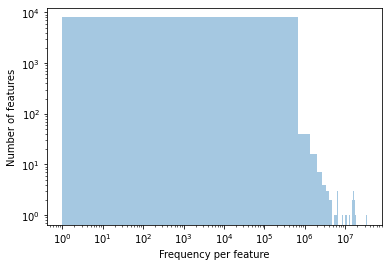

In [14]:
output_viz = feature_table.visualizers.summarize(table=filtered_ogu_table_speciesid.filtered_table)
output_viz.visualization

## Generate a heatmap of phylum to visualize this feature table (species, genus, class) would be too large to visualize!

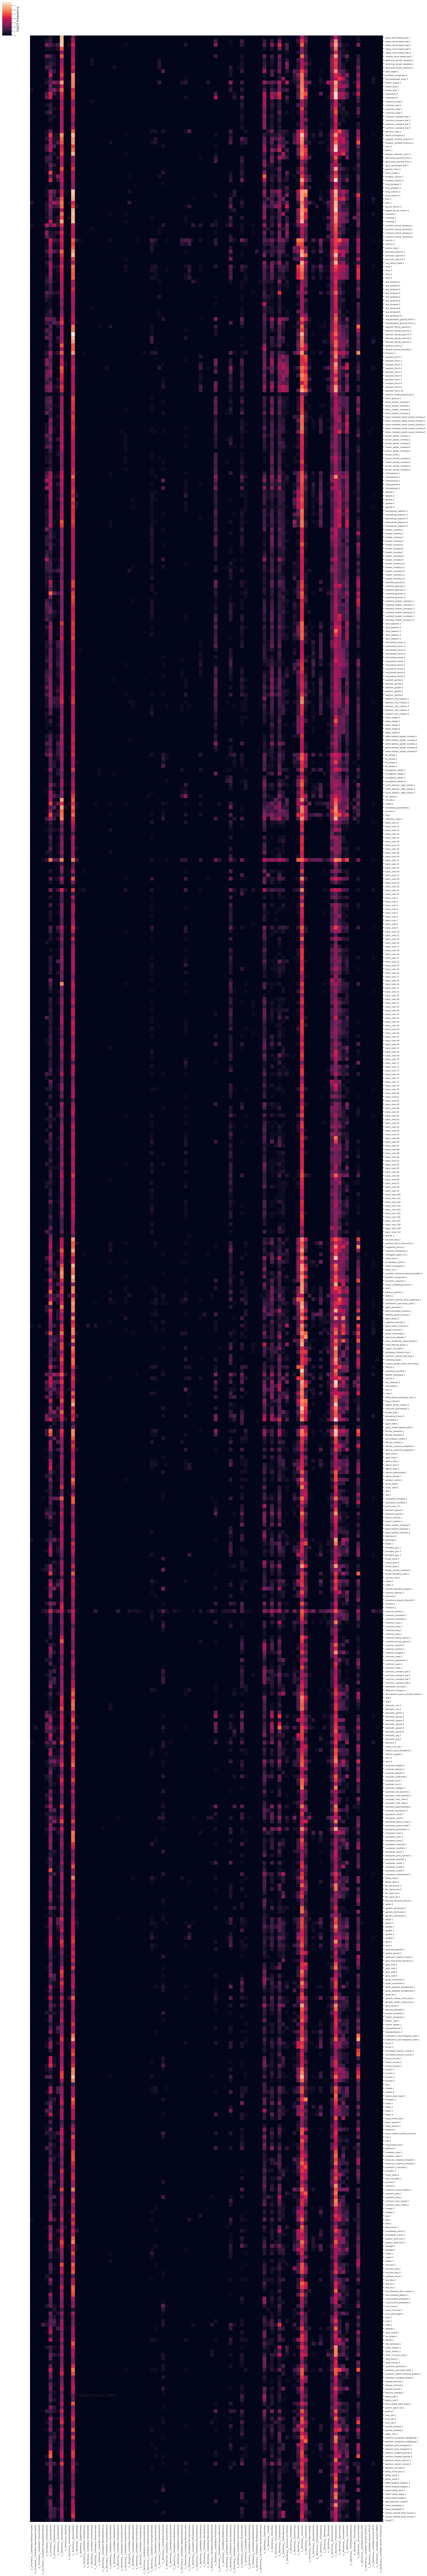

In [19]:
## Feature table of bacterial phylum
heatmap_phylum = feature_table.visualizers.heatmap(phylum_table_speciesid_md, normalize=True, title="Normalized_genus_table", cluster='none')


/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  war

<visualization: Visualization uuid: 311c2b9c-fdaf-4b97-b9fe-837dcd079d7c>

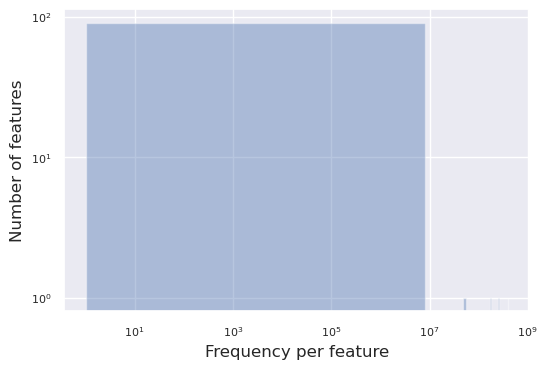

In [87]:
output_viz = feature_table.visualizers.summarize(table=phylum_table_speciesid_md)
output_viz.visualization

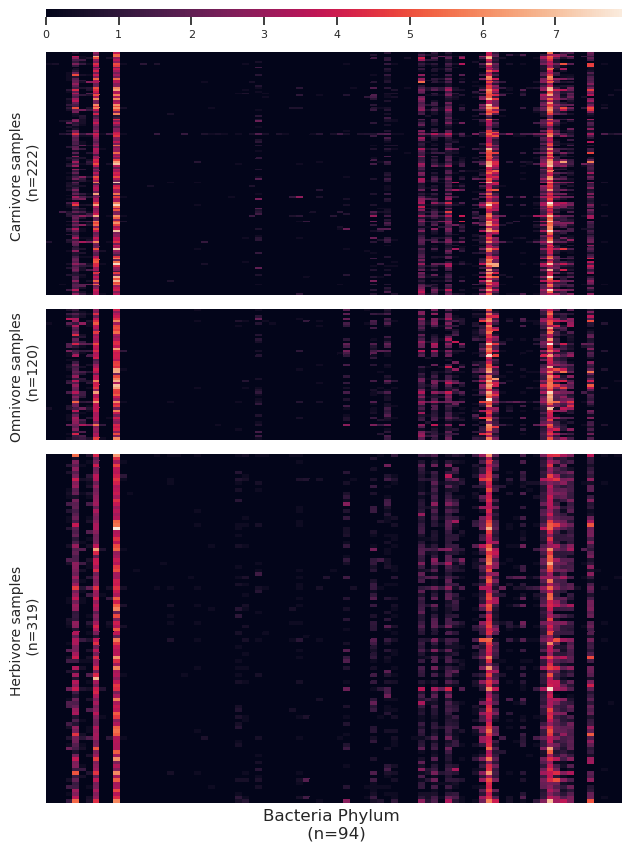

In [23]:
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4, 1, figsize=(6.2, 8.4),
                                         gridspec_kw={'height_ratios': [ 0.01, 0.3358, 0.181540, 0.4826]},
                                        constrained_layout=True)

kwargs = dict(normalize='log10',
              flip=False,
              linewidths=0,
              metadata=metadata,
              xticklabels=False)

dokdo.heatmap(phylum_table_speciesid_md, ax=ax2, where="[diet_category_3] IN ('carnivore')", cbar=False, yticklabels=False, **kwargs)
dokdo.heatmap(phylum_table_speciesid_md, ax=ax3, where="[diet_category_3] IN ('omnivore')", yticklabels=False, cbar=False, **kwargs)
dokdo.heatmap(phylum_table_speciesid_md, ax=ax4, where="[diet_category_3] IN ('herbivore')", yticklabels=False, cbar_ax=ax1, cbar_kws={"orientation":"horizontal"}, **kwargs)

ax2.set_ylabel('Carnivore samples \n (n=222)', fontsize=10)
ax3.set_ylabel('Omnivore samples \n (n=120)', fontsize=10)
ax4.set_ylabel('Herbivore samples \n (n=319)', fontsize=10)
ax4.set_xlabel('Bacteria Phylum \n (n=94)')

#plt.savefig(output_fig_dir+"heatmap_divided_with_diet3_adjusted.png",dpi=900, bbox_inches="tight")
plt.show()

##### From the above heatmap we see our samples to have phylum known to be common enteric bacteria highlighted, which makes sense since our samples are fecal/stool samples! 

# Alpha rarefaction analysis 

In [114]:
alpha_diversity_metrics=['faith_pd','shannon','observed_features']
alpha_curve = diversity.visualizers.alpha_rarefaction(filtered_ogu_table_speciesid.filtered_table,max_depth=370000,phylogeny=wol_tree,metrics=set(alpha_diversity_metrics),metadata=metadata,min_depth=1000,iterations=5)

In [116]:
alpha_curve_vis=alpha_curve.visualization

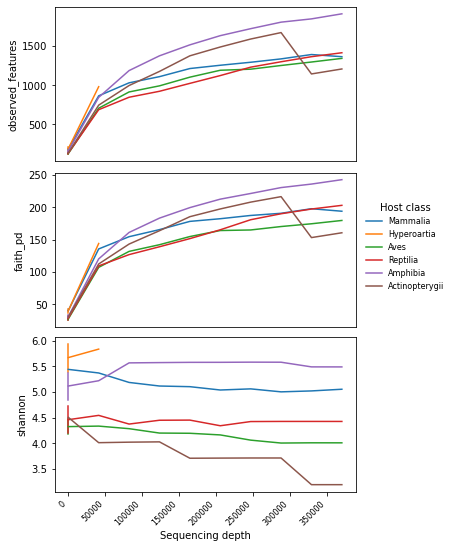

In [117]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6.2,7.5),constrained_layout=True)

ax1=dokdo.alpha_rarefaction_plot(alpha_curve_vis, hue="host_class", metric='observed_features',ax=ax1)
ax1.get_legend().remove()
ax1.tick_params (bottom = False)
ax1.xaxis.label.set_visible(False)
ax1.set(xticklabels=[])

ax2=dokdo.alpha_rarefaction_plot(alpha_curve_vis, hue="host_class", metric='faith_pd',ax=ax2)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend( handles[0:6],labels[0:6], frameon=False, bbox_to_anchor=(1.01,0.85), fontsize=8, loc=2, title="Host class")
ax2.tick_params(bottom = False)
ax2.xaxis.label.set_visible(False)
ax2.set(xticklabels=[])

ax3=dokdo.alpha_rarefaction_plot(alpha_curve_vis, hue="host_class", metric='shannon',ax=ax3)
# print(ax3.get_xticklabels())
ax3.get_legend().remove()
plt.draw()
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=45,horizontalalignment="right",fontsize=8)

plt.savefig(output_fig_dir+"alpha_rarefaction_curve_with_3_alpha_metrics.png",dpi=900, bbox_inches="tight")
fig.show()

### Rarefaction depth of 50,000 was chosen (This depth 2.15% of features in 65.28% of the samples)

# Diversity analysis

## Create the rarified table first
rarefy_ogu_result = feature_table.methods.rarefy(table=filtered_ogu_table_speciesid, sampling_depth=50000)
rarefied_ogu_table = rarefy_ogu_result.rarefied_table

## Visualize all three alpha metric for host_class on one graph with samples rarified to 50,000 
alpha_result_ofeature = diversity.pipelines.alpha(table=rarefied_ogu_table, metric='observed_features')
alpha_result_shannon = diversity.pipelines.alpha(table=rarefied_ogu_table, metric='shannon')
alpha_result_pd = diversity.pipelines.alpha_phylogenetic(table=rarefied_ogu_table, phylogeny=wol_tree, metric='faith_pd')

In [15]:
## Run core phylogeny 
core_metrics = diversity.pipelines.core_metrics_phylogenetic(table=filtered_ogu_table_speciesid.filtered_table,
                                                           phylogeny=wol_tree,
                                                           sampling_depth=50000,
                                                           metadata = metadata)

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.18510335590795823 and the largest is 10.642824988286335.
  RuntimeWarning
/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their 

In [156]:
core_metrics ## View available "objects" in the output list of results 

Results (name = value)
----------------------------------------------------------------------------------------------------------------------
rarefied_table                     = <artifact: FeatureTable[Frequency] uuid: 1c5255db-6774-40a9-95b4-07770a19067e>
faith_pd_vector                    = <artifact: SampleData[AlphaDiversity] uuid: a768a2aa-858f-4846-804d-99b206b0ef7c>
observed_features_vector           = <artifact: SampleData[AlphaDiversity] uuid: e36e15f4-cb61-4085-aca8-83454eeb3027>
shannon_vector                     = <artifact: SampleData[AlphaDiversity] uuid: 7ef5a483-a1e9-4eff-ad27-db87890a617c>
evenness_vector                    = <artifact: SampleData[AlphaDiversity] uuid: 9221c533-d08b-4037-acd5-49feab2a18de>
unweighted_unifrac_distance_matrix = <artifact: DistanceMatrix uuid: 78ea04e3-3529-492b-8b9a-4fc85d436897>
weighted_unifrac_distance_matrix   = <artifact: DistanceMatrix uuid: 1e43fbfd-e590-4ecb-95a5-a7fbbca3aa87>
jaccard_distance_matrix            = <artifact: Dist

In [16]:
observed_features_group_significance= diversity.actions.alpha_group_significance(core_metrics.observed_features_vector, metadata)
observed_features_group_significance.visualization

<visualization: Visualization uuid: 4559d333-819f-4cd8-976e-9df93ffbcc07>

In [18]:
faith_pd_group_significance= diversity.actions.alpha_group_significance(core_metrics.faith_pd_vector, metadata)
faith_pd_group_significance.visualization

<visualization: Visualization uuid: 0d35cf7f-86c3-4a0c-9932-d2250bc31774>

In [19]:
shannon_group_significance= diversity.actions.alpha_group_significance(core_metrics.shannon_vector, metadata)
shannon_group_significance.visualization

<visualization: Visualization uuid: bb24ee99-8c3d-4ab5-b75c-f2b00835b3c1>

#### Alpha diversity over host class ### Remember rarefaction took out some of our samples!!!!

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

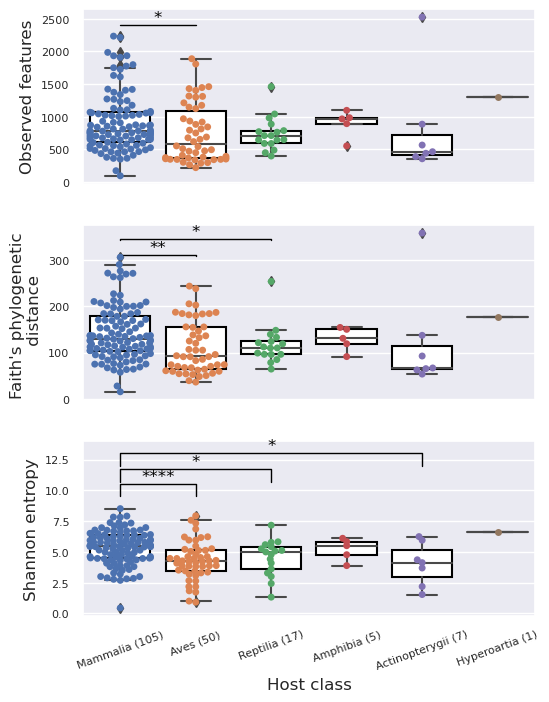

In [81]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6.2,8.4),constrained_layout=True)

# my_colors = ["#9b59b6", "#3498db", "#2ecc71","#3498db","#3498db"]
# sns.set_palette(my_colors)
dokdo.alpha_diversity_plot(core_metrics.observed_features_vector,
                           metadata=metadata,
                           order = ["Mammalia", "Aves", "Reptilia", "Amphibia", "Actinopterygii","Hyperoartia"],
                           where='host_class', ax=ax1, add_swarmplot=True)
dokdo.addsig(0,1,2400,t='*',ax=ax1)
ax1.set_alpha(0.1)
ax1.tick_params(bottom = False)
ax1.xaxis.label.set_visible(False)
ax1.set(xticklabels=[])




dokdo.alpha_diversity_plot(core_metrics.faith_pd_vector,
                           metadata=metadata, 
                           order = ["Mammalia", "Aves", "Reptilia", "Amphibia", "Actinopterygii","Hyperoartia"],
                           where='host_class', ax=ax2, add_swarmplot=True)
dokdo.addsig(0,2,345,t='*',ax=ax2)
dokdo.addsig(0,1,310,t='**',ax=ax2)
ax2.tick_params(bottom = False)
ax2.xaxis.label.set_visible(False)
ax2.set(xticklabels=[])



dokdo.alpha_diversity_plot(core_metrics.shannon_vector,
                           metadata=metadata,
                           order = ["Mammalia", "Aves", "Reptilia", "Amphibia", "Actinopterygii","Hyperoartia"],
                           where='host_class', ax=ax3, add_swarmplot=True)
dokdo.addsig(0,4,12,t='*',ax=ax3)
dokdo.addsig(0,2, 10.7,t='*',ax=ax3)
dokdo.addsig(0,1,9.5,t='****',ax=ax3)
plt.draw()
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=20,horizontalalignment="center",fontsize=8)
ax3.set_ylim(top=14)

## Coded names --> names
ax1.set_ylabel("Observed features")
ax2.set_ylabel("Faith's phylogenetic \n distance")
ax3.set_ylabel("Shannon entropy")
ax3.set_xlabel("Host class")


plt.savefig(output_fig_dir+"alpha_diversity_host_class_group_with_swarmplot.png",dpi=900, bbox_inches="tight")
plt.tight_layout() 
fig.show()

#### Alpha diversity over general diet category 

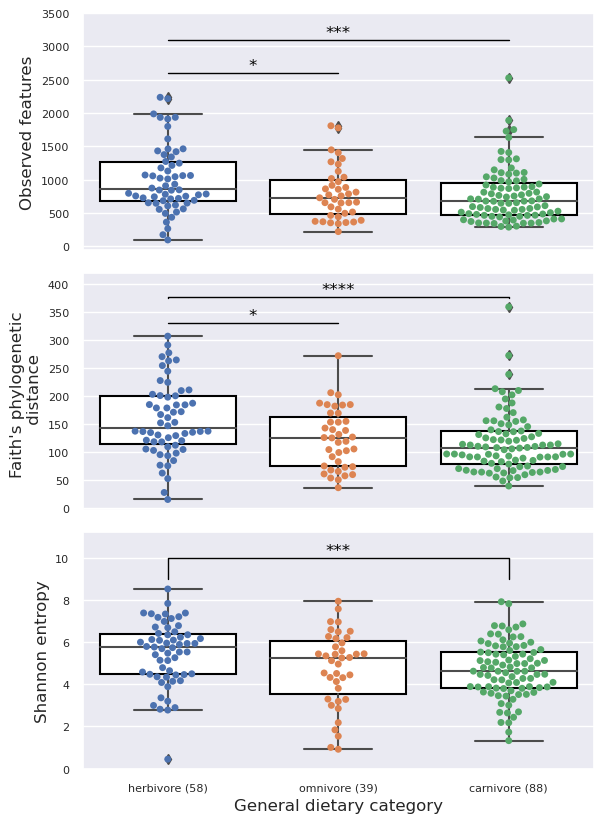

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6.2,8.4),constrained_layout=False)

dokdo.alpha_diversity_plot(core_metrics.observed_features_vector,
                           metadata=metadata,
                           where='diet_category_3', 
                           order = ["herbivore", "omnivore", "carnivore"],
                           ax=ax1, add_swarmplot=True)
dokdo.addsig(0,2,3100,t='***',ax=ax1) ## herb-omni
dokdo.addsig(0,1,2600,t='*',ax=ax1) ## herb-carni
ax1.tick_params(bottom = False)
ax1.xaxis.label.set_visible(False)
ax1.set(xticklabels=[])
ax1.set_ylim(top=3500)

dokdo.alpha_diversity_plot(core_metrics.faith_pd_vector,
                           metadata=metadata,
                           where='diet_category_3', 
                           order = ["herbivore", "omnivore", "carnivore"],
                           ax=ax2, add_swarmplot=True)
dokdo.addsig(0,2,375,t='****',ax=ax2) ## herb-omni
dokdo.addsig(0,1,330,t='*',ax=ax2) ## herb-carni
ax2.tick_params(bottom = False)
ax2.xaxis.label.set_visible(False)
ax2.set(xticklabels=[])
ax2.set_ylim(top=420)

dokdo.alpha_diversity_plot(core_metrics.shannon_vector,
                           metadata=metadata,
                           where='diet_category_3', 
                           order = ["herbivore", "omnivore", "carnivore"],
                           ax=ax3, add_swarmplot=True)
dokdo.addsig(0,2,9,t='***',ax=ax3) ## carni-herb
ax3.set_ylim(top=11.2)
plt.draw()
ax3.set_xticklabels(ax3.get_xticklabels(),horizontalalignment="center",fontsize=8)


## Coded names --> names
ax1.set_ylabel("Observed features")
ax2.set_ylabel("Faith's phylogenetic \n distance")
ax3.set_ylabel("Shannon entropy")
ax3.set_xlabel("General dietary category")

#plt.savefig(output_fig_dir+"alpha_diversity_diet_category_3_group_with_swarmplot.png",dpi=900, bbox_inches="tight")
plt.tight_layout() 
fig.show()

#### Alpha diversity over captive_wild

In [37]:
make_no_human_metadata=True
if make_no_human_metadata:
    metadata_df=metadata.to_dataframe()
    metadata_df_noHuman = metadata_df.loc[ metadata_df["captive_wild"] != "human",]
    metadata_df_noHuman.to_csv(metadata_path3, sep='\t')
    metadata_nohuman = qiime2.Metadata.load(metadata_path3)
else:
    metadata_nohuman = qiime2.Metadata.load(metadata_path3)

In [38]:
type(metadata)

qiime2.metadata.metadata.Metadata

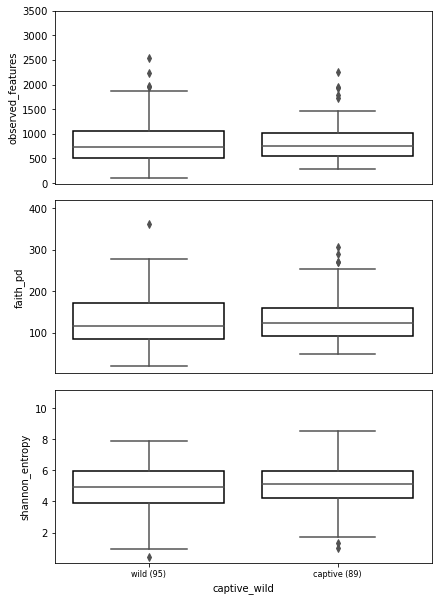

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6.2,8.4),constrained_layout=False)

dokdo.alpha_diversity_plot(core_metrics.observed_features_vector,
                           metadata=metadata_nohuman,
                           where='captive_wild', 
                           ax=ax1)
# dokdo.addsig(0,2,3100,t='***',ax=ax1) ## herb-omni
# dokdo.addsig(0,1,2600,t='*',ax=ax1) ## herb-carni
ax1.tick_params(bottom = False)
ax1.xaxis.label.set_visible(False)
ax1.set(xticklabels=[])
ax1.set_ylim(top=3500)

dokdo.alpha_diversity_plot(core_metrics.faith_pd_vector,
                           metadata=metadata_nohuman,
                           where='captive_wild', 
                           ax=ax2)
# dokdo.addsig(0,2,375,t='****',ax=ax2) ## herb-omni
# dokdo.addsig(0,1,330,t='*',ax=ax2) ## herb-carni
ax2.tick_params(bottom = False)
ax2.xaxis.label.set_visible(False)
ax2.set(xticklabels=[])
ax2.set_ylim(top=420)

dokdo.alpha_diversity_plot(core_metrics.shannon_vector,
                           metadata=metadata_nohuman,
                           where='captive_wild', 
                           ax=ax3)
# dokdo.addsig(0,2,9,t='***',ax=ax3) ## carni-herb
ax3.set_ylim(top=11.2)
plt.draw()
ax3.set_xticklabels(ax3.get_xticklabels(),horizontalalignment="center",fontsize=8)

plt.savefig(output_fig_dir+"alpha_diversity_captive_wild_group_human_removed.png",dpi=900, bbox_inches="tight")
plt.tight_layout() 
fig.show()

#### Alpha diversity over studyID

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


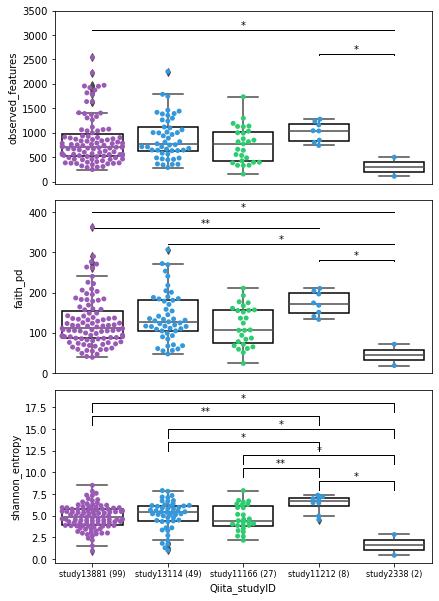

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6.2,8.4),constrained_layout=False)

dokdo.alpha_diversity_plot(core_metrics.observed_features_vector,
                           metadata=metadata,
                           where='Qiita_studyID', 
                           order = ['study13881', 'study13114', 'study11166','study11212','study2338'],
                           ax=ax1, add_swarmplot=True)
dokdo.addsig(0,4,3100,t='*',ax=ax1)
dokdo.addsig(3,4,2600,t='*',ax=ax1) 
ax1.tick_params(bottom = False)
ax1.xaxis.label.set_visible(False)
ax1.set(xticklabels=[])
ax1.set_ylim(top=3500)

dokdo.alpha_diversity_plot(core_metrics.faith_pd_vector,
                           metadata=metadata,
                           where='Qiita_studyID', 
                           order = ['study13881', 'study13114', 'study11166','study11212','study2338'],
                           ax=ax2, add_swarmplot=True)
dokdo.addsig(0,4,400,t='*',ax=ax2)
dokdo.addsig(0,3,360,t='**',ax=ax2)
dokdo.addsig(1,4,320,t='*',ax=ax2) 
dokdo.addsig(3,4,280,t='*',ax=ax2) 
ax2.tick_params(bottom = False)
ax2.xaxis.label.set_visible(False)
ax2.set(xticklabels=[])
ax2.set_ylim(top=430)

dokdo.alpha_diversity_plot(core_metrics.shannon_vector,
                           metadata=metadata,
                           where='Qiita_studyID', 
                           order = ['study13881', 'study13114', 'study11166','study11212','study2338'],
                           ax=ax3, add_swarmplot=True)
dokdo.addsig(0,4,17,t='*',ax=ax3)
dokdo.addsig(0,3,15.5,t='**',ax=ax3)
dokdo.addsig(1,4,14,t='*',ax=ax3) 
dokdo.addsig(1,3,12.5,t='*',ax=ax3)
dokdo.addsig(2,4,11,t='*',ax=ax3)
dokdo.addsig(2,3,9.5,t='**',ax=ax3)
dokdo.addsig(3,4,8,t='*',ax=ax3)

ax3.set_ylim(top=19.5)
plt.draw()
ax3.set_xticklabels(ax3.get_xticklabels(),horizontalalignment="center",fontsize=8)

plt.savefig(output_fig_dir+"alpha_diversity_qiita_studyID_with_swarmplot.png",dpi=900, bbox_inches="tight")
plt.tight_layout() 
fig.show()

### Beta-diversity analysis

### First visualize PCoA then run PERMANOVA

In [20]:
## Unweighted unifrac
core_metrics.unweighted_unifrac_emperor

<visualization: Visualization uuid: b8bb7edd-7cd8-478b-b73f-96cfa4393f1b>

In [21]:
core_metrics.weighted_unifrac_emperor

<visualization: Visualization uuid: d030fe5f-6822-47ed-8080-5e1d4748543a>

In [22]:
core_metrics.bray_curtis_emperor                

<visualization: Visualization uuid: abf0955b-a2b5-44e4-be16-30f553b8ec31>

In [23]:
core_metrics.jaccard_emperor                

<visualization: Visualization uuid: 10ac13f8-d53e-476f-9aa7-baa1f8659382>

## Run permanova on weighted unifrac on three categories captive_wild, diet 3, host class
### host class

In [24]:
weighted_unifrac_group_beta=diversity.actions.beta_group_significance(core_metrics.weighted_unifrac_distance_matrix, metadata=metadata.get_column('host_class'),method='permdisp')
weighted_unifrac_group_beta.visualization

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -1.0239225297179528 and the largest is 56.890196839316054.
  RuntimeWarning


<visualization: Visualization uuid: 2f86e698-3e78-4ff1-b10a-6feb9c4ab2ea>

<Figure size 432x288 with 0 Axes>

In [25]:
weighted_unifrac_group_beta=diversity.actions.beta_group_significance(core_metrics.weighted_unifrac_distance_matrix, metadata=metadata.get_column('host_class'),method='permanova')
weighted_unifrac_group_beta.visualization

<visualization: Visualization uuid: 5373d941-dd51-4bd6-82a0-c0864484e020>

<Figure size 432x288 with 0 Axes>

### diet 3

In [26]:
weighted_unifrac_group_beta=diversity.actions.beta_group_significance(core_metrics.weighted_unifrac_distance_matrix, metadata=metadata.get_column('diet_category_3'),method='permdisp')
weighted_unifrac_group_beta.visualization

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -1.0239225297179528 and the largest is 56.890196839316054.
  RuntimeWarning


<visualization: Visualization uuid: a6179716-d231-4187-8e62-39c8a91a5e22>

<Figure size 432x288 with 0 Axes>

In [27]:
weighted_unifrac_group_beta=diversity.actions.beta_group_significance(core_metrics.weighted_unifrac_distance_matrix, metadata=metadata.get_column('diet_category_3'),method='permanova')
weighted_unifrac_group_beta.visualization

<visualization: Visualization uuid: f3760c68-ae06-4079-8799-453f58e953b6>

<Figure size 432x288 with 0 Axes>

## Captive_wild

In [28]:
weighted_unifrac_group_beta=diversity.actions.beta_group_significance(core_metrics.weighted_unifrac_distance_matrix, metadata=metadata.get_column('captive_wild'),method='permdisp')
weighted_unifrac_group_beta.visualization

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -1.0239225297179528 and the largest is 56.890196839316054.
  RuntimeWarning


<visualization: Visualization uuid: 09620884-a320-4590-b0cf-7f9531210fda>

<Figure size 432x288 with 0 Axes>

In [29]:
weighted_unifrac_group_beta=diversity.actions.beta_group_significance(core_metrics.weighted_unifrac_distance_matrix, metadata=metadata.get_column('captive_wild'),method='permanova')
weighted_unifrac_group_beta.visualization

<visualization: Visualization uuid: 4e41f21e-ecf6-4b8c-bd96-84c5eb94e543>

<Figure size 432x288 with 0 Axes>

## StudyID

In [94]:
weighted_unifrac_group_beta=diversity.actions.beta_group_significance(core_metrics.weighted_unifrac_distance_matrix, metadata=metadata.get_column('Qiita_studyID'),method='permdisp')
weighted_unifrac_group_beta.visualization

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -1.0127895999445948 and the largest is 56.90465827681815.
  RuntimeWarning


<visualization: Visualization uuid: 121b8534-9a53-4341-9ecb-5c6eca8a8798>

<Figure size 600x400 with 0 Axes>

In [95]:
weighted_unifrac_group_beta=diversity.actions.beta_group_significance(core_metrics.weighted_unifrac_distance_matrix, metadata=metadata.get_column('Qiita_studyID'),method='permanova')
weighted_unifrac_group_beta.visualization

<visualization: Visualization uuid: 9d8fbc9d-228b-4a1b-bb34-bb2a6e4aacfa>

<Figure size 600x400 with 0 Axes>

### Visualize beta diversity analysis in PCoA

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


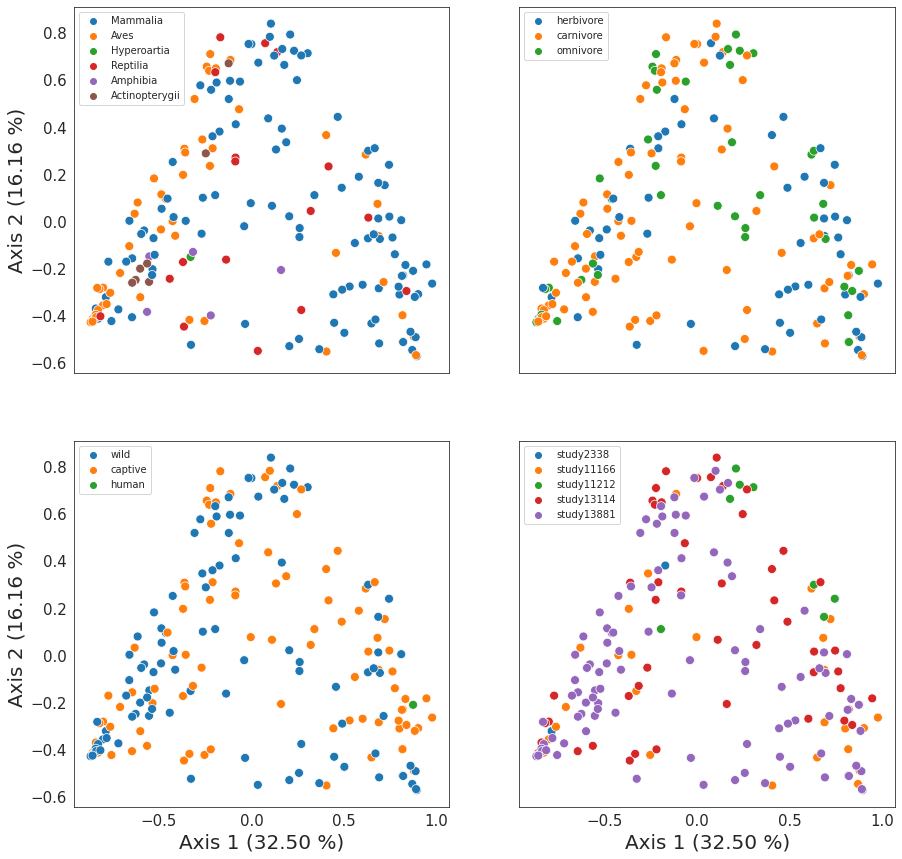

In [286]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(15, 15), sharex=True, sharey=True, constrained_layout=True)
dokdo.beta_2d_plot(core_metrics.weighted_unifrac_pcoa_results,
                   metadata,
                   ax=ax1,
                   hue='host_class')
dokdo.beta_2d_plot(core_metrics.weighted_unifrac_pcoa_results,
                   metadata,
                   ax=ax2,
                   hue='diet_category_3')
dokdo.beta_2d_plot(core_metrics.weighted_unifrac_pcoa_results,
                   metadata,
                   ax=ax3,
                   hue='captive_wild')

dokdo.beta_2d_plot(core_metrics.weighted_unifrac_pcoa_results,
                   metadata,
                   ax=ax4,
                   hue='Qiita_studyID')
# ax1.set_title("hue='body-site'", fontsize=20)
# ax2.set_title("style='subject'", fontsize=20)
# ax3.set_title("size='days-since-experiment-start'", fontsize=20)
# ax4.set_title('Multiple groupings', fontsize=20)
for ax in [ax1, ax2, ax3, ax4]:
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.legend(loc='upper left')

plt.savefig(output_fig_dir+"betadiversity_visualizations_large15x15.png",dpi=900,bbox_inches="tight")
plt.tight_layout()

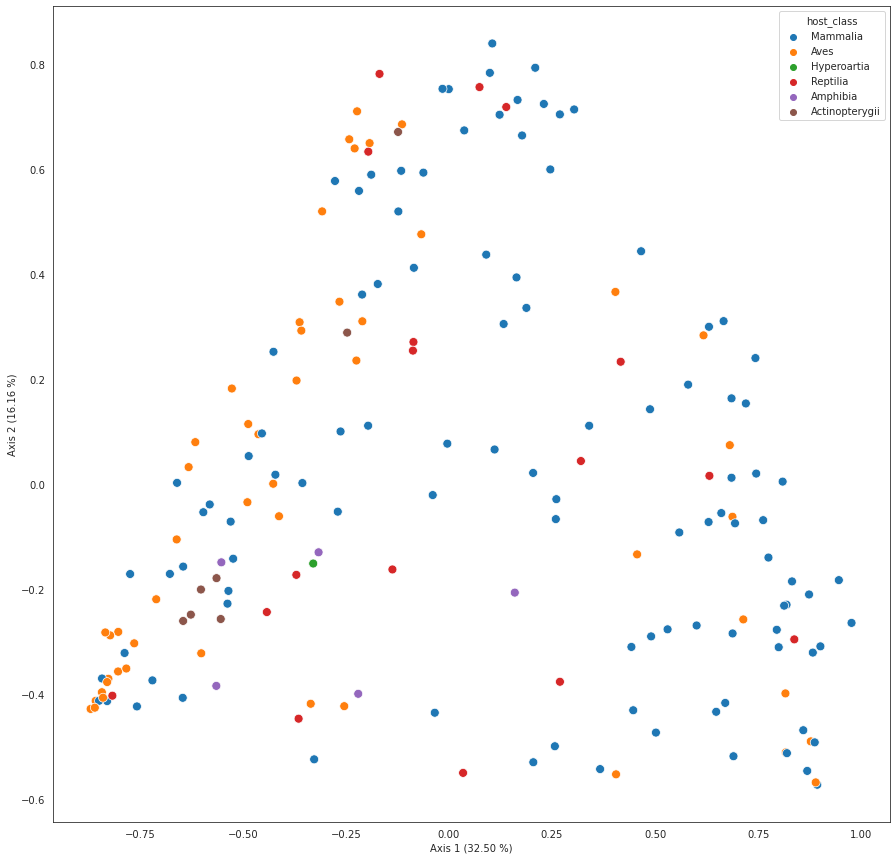

In [270]:
fig, ax1 = plt.subplots(1,1,figsize=(15,15))
dokdo.beta_2d_plot(core_metrics.weighted_unifrac_pcoa_results,
                   metadata,
                   ax=ax1,
                   hue='host_class')

In [ ]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(15, 15))


# Compositionally aware analysis 

In [61]:
## Edited for multiple panels 
def biplot_edited(axis1, axis2, sload, fload, hue, ax, size,
           n_arrow= 15, level=7, cmap = 'Set1'):
    
    """
    This function is a helper for the tutorial. It
    takes ordination inputs from the tutorial and
    plots a compositional biplot.
    
    Parameters
    ----------
    axis1: str - first x-PC axis
    axis2: str - second y-PC axis
    
    sload: pd.DataFrame - sample ordination
    fload: pd.DataFrame - feature ordination
    hue: str - subject groupings
        
    ax: matplitlib subplot
    n_arrow: int - number of arrows to plot
    level: int - taxonomic level to collapse
    Returns
    ----------
    ax: matplitlib subplot
    """

    # sort the arrows by thier PC1, PC2 mag.
    fload['magnitude'] = np.linalg.norm(fload[[axis1, axis2]], axis=1)
    fload = fload.sort_values('magnitude', ascending=False)
    
    # get a taxonomic level split
    def _collapse(tax, max_observed_level = 7):
        tax = [x.strip() for x in tax.split(';')]
        if len(tax) < max_observed_level:
            padding = ['__'] * (max_observed_level - len(tax))
            tax.extend(padding)
        return ';'.join(tax[:level])
    fload['level'] = fload.Taxon.apply(_collapse)
    
    # get cmap for arrows
    arrow_cmap = set(fload.loc[fload.index[: n_arrow], 'level'].values)
    colors_ = plt.get_cmap(cmap, len(arrow_cmap))
    arrow_cmap = {v:colors_(i) for i, v in enumerate(arrow_cmap)}

    # plot the sample loadings
    sns.scatterplot(axis1, axis2,
                    data = sload,
                    hue = hue,
                    palette=cmap,
                    ax=ax,
                    alpha=1)
    # Change font size of x, y label 
    ax.set_xlabel(str(axis1), fontsize=size+1)
    ax.set_ylabel(str(axis2), fontsize=size+1)
        
    # plot the arrows
    legend_arrows = {}
    for i in range(n_arrow):
        # add arrow
        ind_ = fload.index[i]
        arrow_  = ax.arrow(0, 0, fload.loc[ind_, axis1],
                        fload.loc[ind_, axis2],
                        color=arrow_cmap[fload.loc[ind_, 'level']],
                        width=0.001, head_width=0.005)
        legend_arrows[fload.loc[ind_, 'level']] = arrow_
    
    # add legend
#     leg1 = ax.legend(loc='lower left',
#                      bbox_to_anchor=(1, 0.000),
#                      title=hue, fontsize=10)
    leg1 = ax.legend(loc='upper right',
                     title=hue, fontsize=size, title_fontsize=size)
    
    old_keys=list(legend_arrows.keys())
    new_keys=[value.replace("k__Bacteria","").replace(";p__","").replace(";c__",">").replace(";o__",">").replace(";f__",">").replace(";g__",">").replace(";s__",">") for value in old_keys]
    
    ax.legend(list(legend_arrows.values()),
              new_keys, 
              loc='lower left',
              bbox_to_anchor=(-0.23, 1.05),
              title="Top 15 bacteria (aka feature) driving difference in sample microbiome composition (arrows)", 
              fontsize=size, title_fontsize=size)
    ax.add_artist(leg1)
    
        
    return ax

In [71]:
## Edited for a single subplot 
def biplot(axis1, axis2, sload, fload, hue, ax, size=10,
           n_arrow= 15, level=7, cmap = 'tab20', cmap2 = 'gist_rainbow'):
    
    """
    This function is a helper for the tutorial. It
    takes ordination inputs from the tutorial and
    plots a compositional biplot.
    
    Parameters
    ----------
    axis1: str - first x-PC axis
    axis2: str - second y-PC axis
    
    sload: pd.DataFrame - sample ordination
    fload: pd.DataFrame - feature ordination
    hue: str - subject groupings
        
    ax: matplitlib subplot
    n_arrow: int - number of arrows to plot
    level: int - taxonomic level to collapse
    Returns
    ----------
    ax: matplitlib subplot
    """

    # sort the arrows by thier PC1, PC2 mag.
    fload['magnitude'] = np.linalg.norm(fload[[axis1, axis2]], axis=1)
    fload = fload.sort_values('magnitude', ascending=False)
    
    # get a taxonomic level split
    def _collapse(tax, max_observed_level = 7):
        tax = [x.strip() for x in tax.split(';')]
        if len(tax) < max_observed_level:
            padding = ['__'] * (max_observed_level - len(tax))
            tax.extend(padding)
        return ';'.join(tax[:level])
    fload['level'] = fload.Taxon.apply(_collapse)
    
    # get cmap for arrows
    arrow_cmap = set(fload.loc[fload.index[: n_arrow], 'level'].values)
    colors_ = plt.get_cmap(cmap, len(arrow_cmap))
    arrow_cmap = {v:colors_(i) for i, v in enumerate(arrow_cmap)}

    # plot the sample loadings
    sns.scatterplot(axis1, axis2,
                    data = sload,
                    hue = hue,
                    palette=cmap2,
                    ax=ax,
                    alpha=0.8)
    # Change font size of x, y label 
    ax.set_xlabel(str(axis1), fontsize=size+1)
    ax.set_ylabel(str(axis2), fontsize=size+1)
        
    # plot the arrows
    legend_arrows = {}
    for i in range(n_arrow):
        # add arrow
        ind_ = fload.index[i]
        arrow_  = ax.arrow(0, 0, fload.loc[ind_, axis1],
                        fload.loc[ind_, axis2],
                        color=arrow_cmap[fload.loc[ind_, 'level']],
                        width=0.001, head_width=0.005)
        legend_arrows[fload.loc[ind_, 'level']] = arrow_
    
    # add legend
#     leg1 = ax.legend(loc='lower left',
#                      bbox_to_anchor=(1, 0.000),
#                      title=hue, fontsize=10)
    leg1 = ax.legend(loc='upper left', bbox_to_anchor=(1.02,1),
                     title=hue, fontsize=size, title_fontsize=size)
    
    old_keys=list(legend_arrows.keys())
    new_keys=[value.replace("k__Bacteria","").replace(";p__","").replace(";c__",">").replace(";o__",">").replace(";f__",">").replace(";g__",">").replace(";s__",">") for value in old_keys]
    
    ax.legend(list(legend_arrows.values()),
              new_keys, 
              loc='lower left',
              bbox_to_anchor=(-0.2, -.85),
              title="Top 15 bacteria (aka feature) driving difference in sample microbiome composition (arrows)", 
              fontsize=size, title_fontsize=size)
    ax.add_artist(leg1)
    
        
    return ax

In [44]:
table_biom_species_subset = table_biom.filter(df_subsampled["SampleID_2"], inplace=False)
table_biom_species_subset.shape

(7021, 288)

In [45]:
table_biom.shape

(7021, 662)

In [46]:
ordination, distance = auto_rpca(table_biom_species_subset)

In [73]:
ordination, distance = auto_rpca(table_biom)

In [75]:
spca_df = ordination.samples
spca_df.head(2)

PC1       PC2  PC3
Abramis-brama_SAMEA6809635.ebi_filtered_r1r2int... -0.035460  0.017707    0
Acanthiza-uropygialis_SAMEA6809490.ebi_filtered... -0.025189 -0.031895    0

In [76]:
fpca_df = ordination.features
fpca_df.head(2)

PC1       PC2  PC3
k__Archaea;p__;c__;o__;f__;g__;s__uncultured ar...  0.001161  0.000879    0
k__Archaea;p__Candidatus Bathyarchaeota;c__;o__...  0.001711 -0.000127    0

In [77]:
# merge the sample metadata and loadings
spca_df = pd.concat([spca_df, df.reindex(spca_df.index)],
                    axis=1, sort=True)
spca_df.head(2)
spca_df.shape

(656, 30)

In [78]:
# merge the feature metadata and loadings
fpca_df['Taxon'] = fpca_df.index
fpca_df.head(2)
fpca_df.shape

(6362, 4)

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


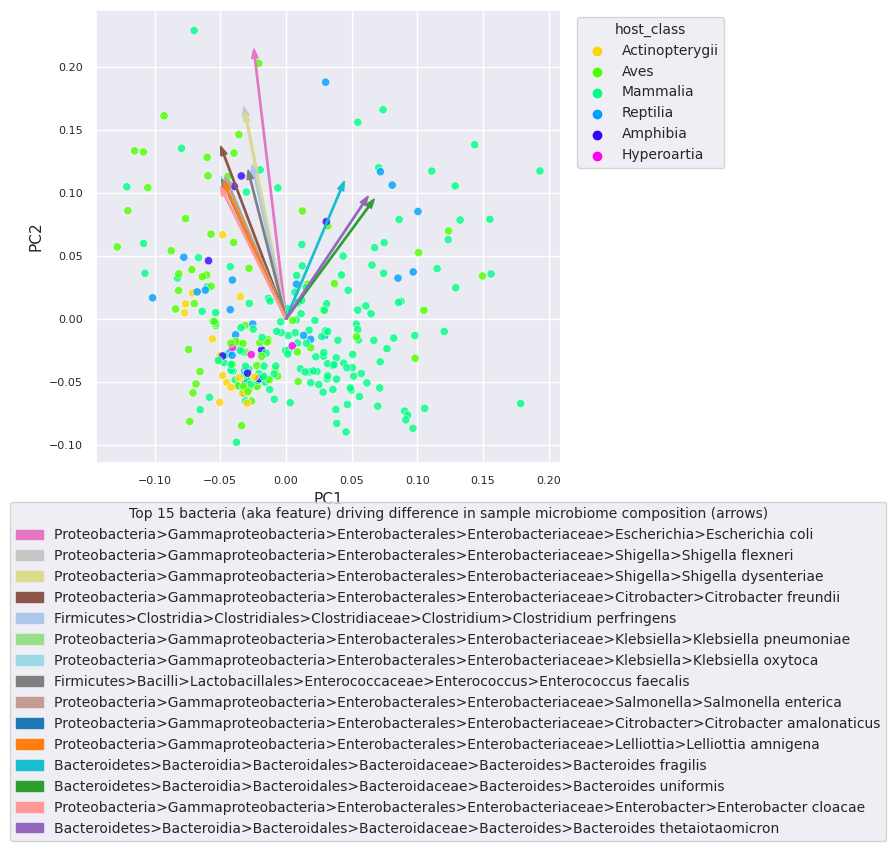

In [67]:
## Color by host_class
fig, ax = plt.subplots(1,1, figsize=(6, 6))

# plot the biplot
ax = biplot('PC1', 'PC2', spca_df, fpca_df, 'host_class', ax)

plt.show()

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


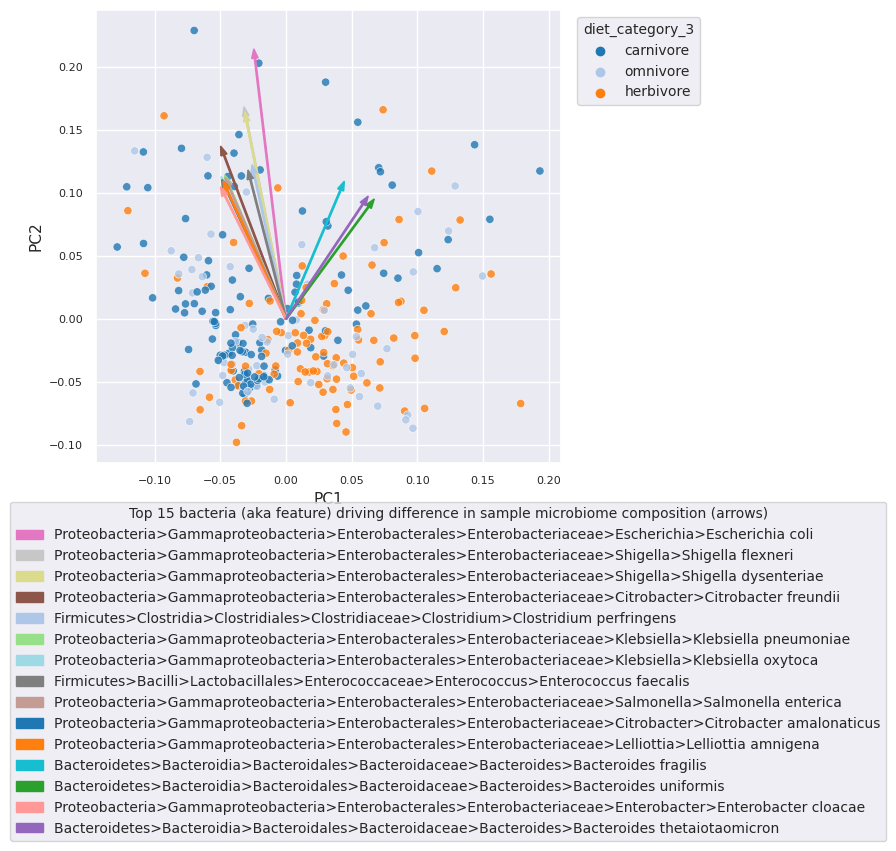

In [59]:
## Color by diet_category_3
fig, ax = plt.subplots(1,1, figsize=(6, 6))

# plot the biplot
ax = biplot('PC1', 'PC2', spca_df, fpca_df, 'diet_category_3', ax)

plt.show()

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


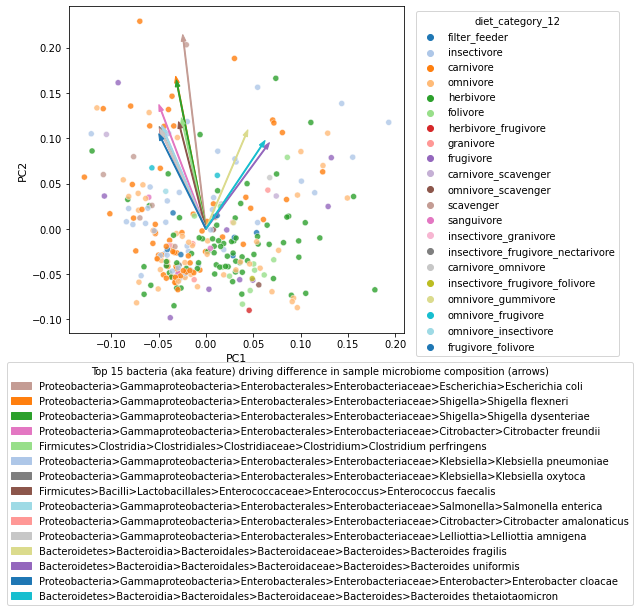

In [62]:
## Color by diet_category_12
fig, ax = plt.subplots(1,1, figsize=(6, 6))

# plot the biplot
ax = biplot('PC1', 'PC2', spca_df, fpca_df, 'diet_category_12', ax)

plt.show()

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


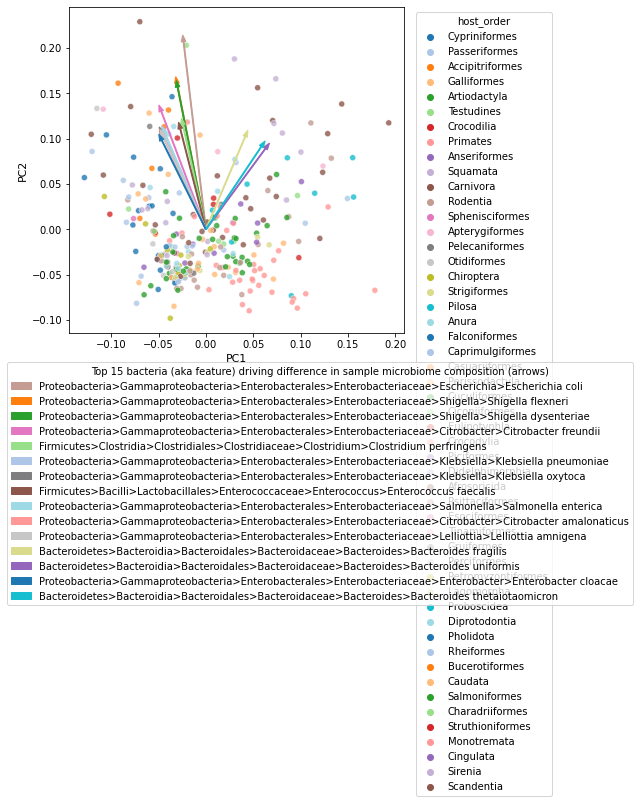

In [63]:
## Color by host_order
fig, ax = plt.subplots(1,1, figsize=(6, 6))

# plot the biplot
ax = biplot('PC1', 'PC2', spca_df, fpca_df, 'host_order', ax)

plt.show()

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


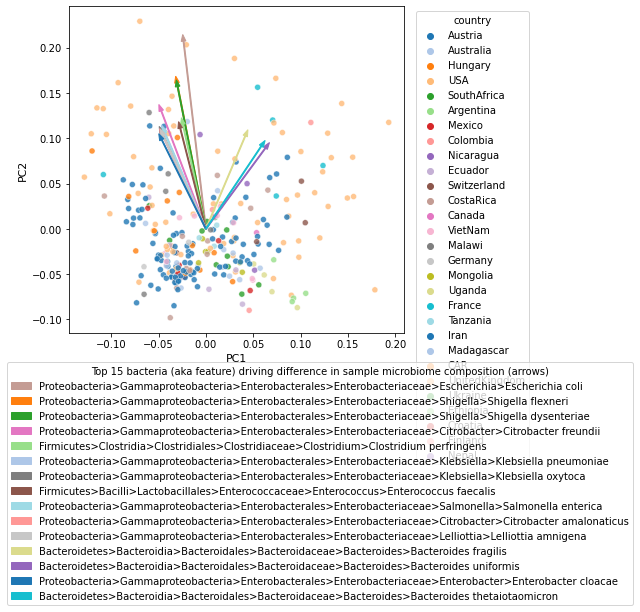

In [64]:
## Color by country
fig, ax = plt.subplots(1,1, figsize=(6, 6))

# plot the biplot
ax = biplot('PC1', 'PC2', spca_df, fpca_df, 'country', ax)

plt.show()

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


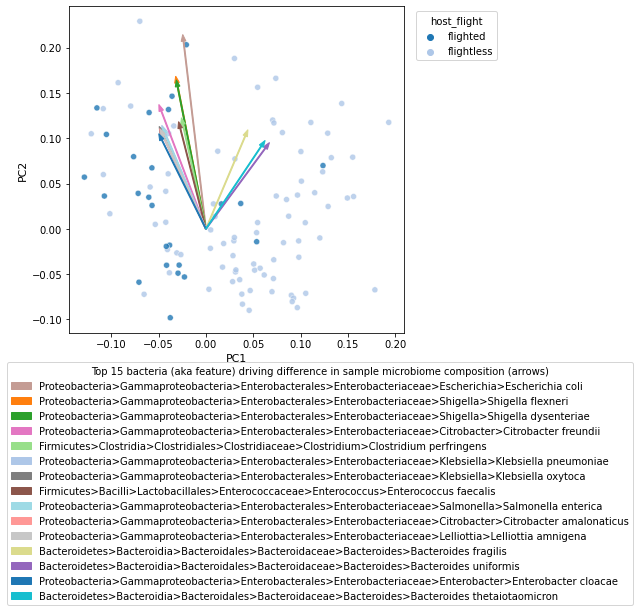

In [65]:
## Color by host_flight
fig, ax = plt.subplots(1,1, figsize=(6, 6))

# plot the biplot
ax = biplot('PC1', 'PC2', spca_df, fpca_df, 'host_flight', ax)

plt.show()

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


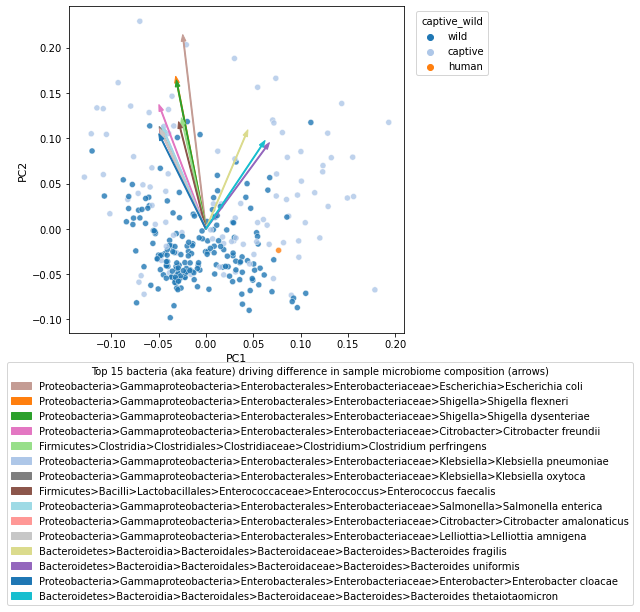

In [66]:
## Color by captive_wild
fig, ax = plt.subplots(1,1, figsize=(6, 6))

# plot the biplot
ax = biplot('PC1', 'PC2', spca_df, fpca_df, 'captive_wild', ax)

plt.show()

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


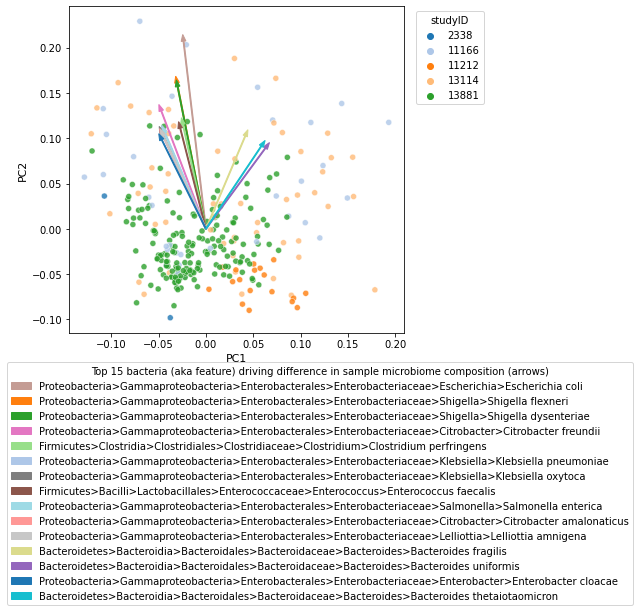

In [67]:
## Color by studyID
fig, ax = plt.subplots(1,1, figsize=(6, 6))

# plot the biplot
ax = biplot('PC1', 'PC2', spca_df, fpca_df, 'studyID', ax)

plt.show()

## Combine all the plots in one page 6 figures 


/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword 

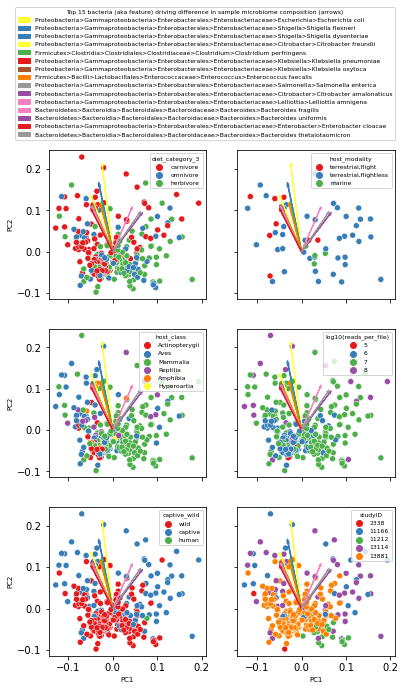

In [69]:
fig, axs = plt.subplots(3,2, figsize=(6.2, 9.3), sharex=True, sharey=True)
# plot the biplot
axs[0,0] = biplot_edited('PC1', 'PC2', spca_df, fpca_df, 'diet_category_3', axs[0,0], 6)

# ax1.le  gend(bbox_to_anchor=(0.,1.02, 1., 0.102), loc='lower left', ncol=2, mode="expand", borderaxespad=0)

axs[0,1] = biplot_edited('PC1', 'PC2', spca_df, fpca_df, 'host_modality', axs[0,1], 6)
# handles, labels = ax2.get_legend_handles_labels()
# ax2.legend( handles[0:0],labels[0:15], frameon=False, bbox_to_anchor=(1.01,0.7), fontsize=8, loc=2, title='MetaPhlAn3\nbacteria profiling')
axs[0,1].get_legend().remove()

axs[1,0] = biplot_edited('PC1', 'PC2', spca_df, fpca_df, 'host_class', axs[1,0], 6)
axs[1,0].get_legend().remove()

axs[1,1] = biplot_edited('PC1', 'PC2', spca_df, fpca_df, 'log10(reads_per_file)', axs[1,1], 6)
axs[1,1].get_legend().remove()

axs[2,0] = biplot_edited('PC1', 'PC2', spca_df, fpca_df, 'captive_wild', axs[2,0], 6)
axs[2,0].get_legend().remove()


axs[2,1] = biplot_edited('PC1', 'PC2', spca_df, fpca_df, 'studyID', axs[2,1], 6)
axs[2,1].get_legend().remove()

plt.savefig(output_fig_dir+"aggregate_rpca_visualizations_6fontsize_subset1sampleperspecies_final.png",dpi=900, bbox_inches="tight")
plt.show()


/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


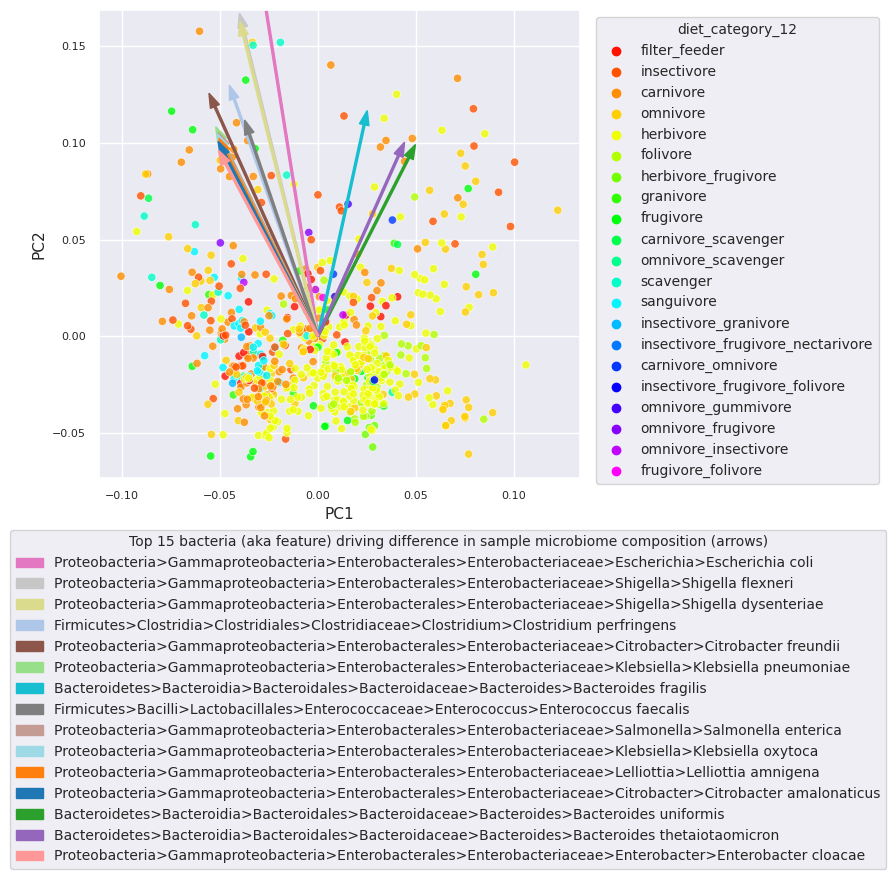

In [80]:
fig, ax = plt.subplots(1,1, figsize=(6.2, 6.2))

# plot the biplot
ax= biplot('PC1', 'PC2', spca_df, fpca_df, 'diet_category_12', ax)

plt.savefig(output_fig_dir+"rpca_visualizations_6fontsize_subset1sampleperspecies_final.png",dpi=900, bbox_inches="tight")
plt.show()

# Conduct permanova analysis on various groups of our samples 

In [71]:
## 662 sample in BIOM but distance only produced for 656 meaning it failed to calculate for 6 samples --> identify them! 
## we have to remove some samples from our df
df_new=df.loc[df.index.isin(distance.ids),:]
df_new.shape

(285, 27)

In [72]:
df_new.head()

sample_name_2  \
SampleID                                                                          
Artibeus-intermedius_S_S_Temp_D709-AK1780_filte...                2338.0623.7.I   
Carollia-perspicillata_S_S_Temp_D709-AK1681_fil...               2338.0701.17.I   
Carollia-sowelli_S_S_Temp_D712-AK1545_filtered_...                2338.0624.6.I   
Lampetra-appendix_S_S_Temp_D703-AK1680_filtered...  11166.lamprey.24146.lamprey   
Haliaeetus-leucocephalus_S_S_Temp_D707-AK1543_f...        11166.ATL.24483.eagle   

                                                    studyID  \
SampleID                                                      
Artibeus-intermedius_S_S_Temp_D709-AK1780_filte...     2338   
Carollia-perspicillata_S_S_Temp_D709-AK1681_fil...     2338   
Carollia-sowelli_S_S_Temp_D712-AK1545_filtered_...     2338   
Lampetra-appendix_S_S_Temp_D703-AK1680_filtered...    11166   
Haliaeetus-leucocephalus_S_S_Temp_D707-AK1543_f...    11166   

                                                                          file_filtered_r1r2_combined  \
SampleID                                                                                                
Artibeus-intermedius_S_S_Temp_D709-AK1780_filte...  Artibeus-intermedius_S_S_Temp_D709-AK1780_filt...   
Carollia-perspicillata_S_S_Temp_D709-AK1681_fil...  Carollia-perspicillata_S_S_Temp_D709-AK1681_fi...   
Carollia-sowelli_S_S_Temp_D712-AK1545_filtered_...  Carollia-sowelli_S_S_Temp_D712-AK1545_filtered...   
Lampetra-appendix_S_S_Temp_D703-AK1680_filtered...  Lampetra-appendix_S_S_Temp_D703-AK1680_filtere...   
Haliaeetus-leucocephalus_S_S_Temp_D707-AK1543_f...  Haliaeetus-leucocephalus_S_S_Temp_D707-AK1543_...   

                                                    reads_per_unfiltered_file  \
SampleID                                                                        
Artibeus-intermedius_S_S_Temp_D709-AK1780_filte...                   10812150   
Carollia-perspicillata_S_S_Temp_D709-AK1681_fil...                     488426   
Carollia-sowelli_S_S_Temp_D712-AK1545_filtered_...                   51599976   
Lampetra-appendix_S_S_Temp_D703-AK1680_filtered...                   79429692   
Haliaeetus-leucocephalus_S_S_Temp_D707-AK1543_f...                   20895600   

                                                    reads_per_file  \
SampleID                                                             
Artibeus-intermedius_S_S_Temp_D709-AK1780_filte...        10809968   
Carollia-perspicillata_S_S_Temp_D709-AK1681_fil...          487862   
Carollia-sowelli_S_S_Temp_D712-AK1545_filtered_...        51540112   
Lampetra-appendix_S_S_Temp_D703-AK1680_filtered...        32380108   
Haliaeetus-leucocephalus_S_S_Temp_D707-AK1543_f...        20223650   

                                                    log10(reads_per_file)_full  \
SampleID                                                                         
Artibeus-intermedius_S_S_Temp_D709-AK1780_filte...                    7.033824   
Carollia-perspicillata_S_S_Temp_D709-AK1681_fil...                    5.688297   
Carollia-sowelli_S_S_Temp_D712-AK1545_filtered_...                    7.712145   
Lampetra-appendix_S_S_Temp_D703-AK1680_filtered...                    7.510278   
Haliaeetus-leucocephalus_S_S_Temp_D707-AK1543_f...                    7.305860   

                                                    log10(reads_per_file)  \
SampleID                                                                    
Artibeus-intermedius_S_S_Temp_D709-AK1780_filte...                      7   
Carollia-perspicillata_S_S_Temp_D709-AK1681_fil...                      6   
Carollia-sowelli_S_S_Temp_D712-AK1545_filtered_...                      8   
Lampetra-appendix_S_S_Temp_D703-AK1680_filtered...                      8   
Haliaeetus-leucocephalus_S_S_Temp_D707-AK1543_f...                      7   

                                                                    species_id  \
SampleID                                          

In [73]:
## 662 sample in BIOM but distance only produced for 656 meaning it failed to calculate for 6 samples --> identify them! 
permanova(distance, df_new['diet_category_3'])

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     285
number of groups                  3
test statistic              0.72478
p-value                       0.527
number of permutations          999
Name: PERMANOVA results, dtype: object

In [75]:
## Input list of categories to look at 
## Have to include sample size = 656 & number of permutations = 999
list_category = ["captive_wild", 'diet_category_12', 'studyID', 'host_class', 'host_order', 'host_family','host_genus','log10(reads_per_file)','country']


category_permanova_dict={}
for value in list_category: 
    print("Running multivariate analysis on "+ value +" category...")
    perma_dict={}
    permanova_info=permanova(distance,df_new[value])
    group_dict={"number of group":permanova_info[3]} ## store group info

    tstatistic_dict={"test statistic":permanova_info[4]}
    pValue_dict={"p-value":permanova_info[5]}
    perma_dict.update({"PERMANOVA":[tstatistic_dict,pValue_dict]}) ## store statistical info for PERMANOVA
    
    print("Done with permanova")

    permdisp_dict={}
    permdisp_info=permdisp(distance,df_new[value])

    tstatistic_dict={"test statistic":permdisp_info[4]}
    pValue_dict={"p-value":permdisp_info[5]}
    permdisp_dict.update({"PERMDISP":[tstatistic_dict,pValue_dict]}) ## store statistical info for PERMDISP

    print("Done with permdisp")
    
    category_permanova_dict.update({value : [group_dict, permdisp_dict, perma_dict]})

Running multivariate analysis on captive_wild category...
Done with permanova
Done with permdisp
Running multivariate analysis on diet_category_12 category...
Done with permanova
Done with permdisp
Running multivariate analysis on studyID category...
Done with permanova
Done with permdisp
Running multivariate analysis on host_class category...
Done with permanova
Done with permdisp
Running multivariate analysis on host_order category...
Done with permanova
Done with permdisp
Running multivariate analysis on host_family category...
Done with permanova
Done with permdisp
Running multivariate analysis on host_genus category...
Done with permanova
Done with permdisp
Running multivariate analysis on log10(reads_per_file) category...
Done with permanova
Done with permdisp
Running multivariate analysis on country category...
Done with permanova
Done with permdisp


In [76]:
# Set up empty datafram
df_perm_info = pd.DataFrame([])

In [77]:
for key, value in category_permanova_dict.items():
    df_perm_info.at[key, "number of group"] = value[0]['number of group']
    for i in range(1,3):
#         print(value[i])
        for statistic in value[i]:
            if statistic == 'PERMDISP':
                df_perm_info.at[key, 'test statistic - permdisp'] = value[i][statistic][0]['test statistic']
                df_perm_info.at[key, 'p-value - permdisp'] = value[i][statistic][1]['p-value']               
            else:
                df_perm_info.at[key, 'test statistic - permanova'] = value[i][statistic][0]['test statistic']
                df_perm_info.at[key, 'p-value - permanova'] = value[i][statistic][1]['p-value']     
#             print(value[i][statistic][0]['test statistic'])
#             print(value[i][statistic][1]['p-value'])

In [79]:
save_multivariate = True
if save_multivariate:
    output_path="/panfs/panfs1.ucsd.edu/panscratch/jhc103/microbiome-analysis/output-multivariate-results"
    df_perm_info.to_csv(join(output_path,"deicode_distance_multivariate_output_microbiome_1samplePerSpecies.txt"))
df_perm_info = pd.read_csv(join(output_path,"deicode_distance_multivariate_output_microbiome_1samplePerSpecies.txt"),index_col=0)
df_perm_info

number of group  test statistic - permdisp  \
captive_wild                       3.0                   1.045999   
diet_category_12                  21.0                   1.224586   
studyID                            5.0                   1.166771   
host_class                         6.0                   0.298850   
host_order                        51.0                   1.157338   
host_family                      119.0                   1.253659   
host_genus                       230.0                   1.278564   
log10(reads_per_file)              4.0                   0.402975   
country                           29.0                   1.224525   

                       p-value - permdisp  test statistic - permanova  \
captive_wild                        0.946                    0.195567   
diet_category_12                    0.678                    1.312309   
studyID                             0.355                    0.996066   
host_class                          0.931                    0.728160   
host_order                          0.623                    0.815326   
host_family                         0.109                    0.919770   
host_genus                          0.472                    1.059530   
log10(reads_per_file)               0.761                    0.287893   
country                             0.368                    0.649503   

                       p-value - permanova  
captive_wild                         0.919  
diet_category_12                     0.139  
studyID                              0.414  
host_class                           0.675  
host_order                           0.865  
host_family                          0.722  
host_genus                           0.397  
log10(reads_per_file)                0.929  
country                              0.960

## Investigate abundance

In [330]:
path_to_taxonomy = "/panfs/panfs1.ucsd.edu/panscratch/jhc103/microbiome-analysis/taxonomy.qza"
taxonomy_data=Artifact.load(path_to_taxonomy)
taxonomy_data

<artifact: FeatureData[Taxonomy] uuid: 38db68ef-8d6c-4518-a9f8-8124ce1e2980>

In [331]:
taxonomy_df = taxonomy_data.view(pd.DataFrame)
taxonomy_df.head()

Taxon
Feature ID                                                   
G000005825  k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...
G000006175  k__Archaea;p__Euryarchaeota;c__Methanococci;o_...
G000006605  k__Bacteria;p__Actinobacteria;c__Actinobacteri...
G000006725  k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
G000006745  k__Bacteria;p__Proteobacteria;c__Gammaproteoba...

In [334]:
taxa_visualizer = taxa.visualizers.barplot(filtered_ogu_table_speciesid.filtered_table, taxonomy_data, metadata)
taxa_visualizer.visualization

<visualization: Visualization uuid: c4d67731-f68f-4e40-94c6-4c1da45dca00>

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (6838,6839,6842) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


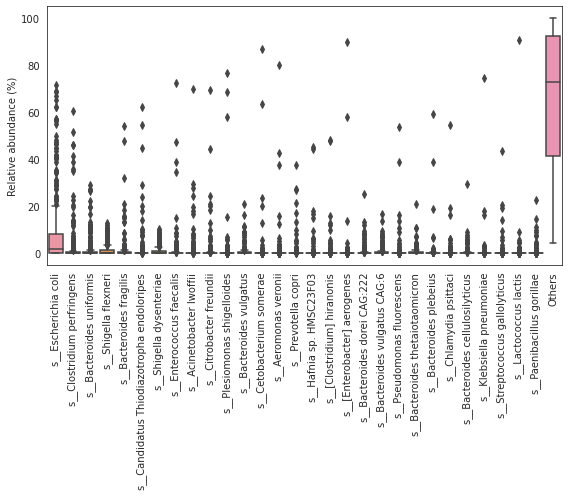

In [339]:
dokdo.taxa_abundance_box_plot(
    taxa_visualizer.visualization,
    level=7,
    count=30,
    figsize=(8, 7),
    pretty_taxa=True
)
plt.tight_layout()